<a href="https://colab.research.google.com/github/whatnews72/----/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기 및 확인


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist


(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print('\n train shape = ', x_train.shape,
      ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape,
      ', test label shape = ', t_test.shape)

print('\n train label = ', t_train)    #학습데이터 정답 출력
print(' test label = ', t_test)        #테스트 데이터 정답 출력

4422102/4422102 [==============================] - 0s 0us/step

 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape =  (10000,)

 train label =  [9 0 0 ... 3 0 5]
 test label =  [9 2 1 ... 8 1 5]


## 25개의 이미지 출력

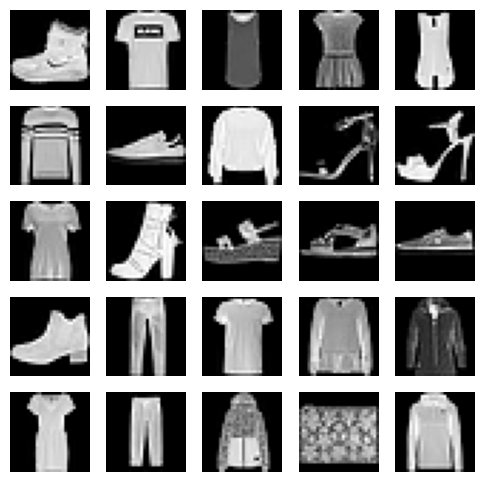

In [ ]:
plt.figure(figsize=(6,6))

for index in range(25):
    plt.subplot(5,5,index+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')

plt.show()

#[2] 데이터 전처리 (정규화 만을 수행함)


In [ ]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)
x_train = ( x_train - 0.0)/ (255.0 - 0.0)
x_test = ( x_test - 0.0)/ (255.0 - 0.0)

#[3] 모델 구축 및 컴파일

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#[4] 모델 학습

In [ ]:
hist = model.fit(x_train, t_train, epochs=30, batch_size=32, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 9s 6ms/step - loss: 0.5342 - accuracy: 0.8133 - val_loss: 0.4345 - val_accuracy: 0.8405
Epoch 2/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3942 - accuracy: 0.8599 - val_loss: 0.3802 - val_accuracy: 0.8657
Epoch 3/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3555 - accuracy: 0.8721 - val_loss: 0.3713 - val_accuracy: 0.8661
Epoch 4/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3271 - accuracy: 0.8802 - val_loss: 0.3475 - val_accuracy: 0.8740
Epoch 5/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3068 - accuracy: 0.8879 - val_loss: 0.3541 - val_accuracy: 0.8743
Epoch 6/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2896 - accuracy: 0.8940 - val_loss: 0.3395 - val_accuracy: 0.8778
Epoch 7/30
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2779 - accuracy: 0.8983 - val_loss: 0.3543 - val_accuracy:

#[5] 모델(정확도) 평가

In [ ]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4461 - accuracy: 0.8802


[0.4461151361465454, 0.8802000284194946]

#[6] 손실 및 정확도

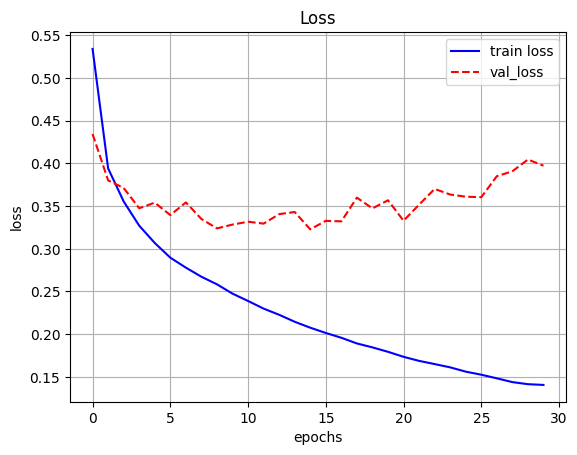

In [ ]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.plot(hist.history['val_loss'], 'r--', label='val_loss')
plt.legend(loc='best')

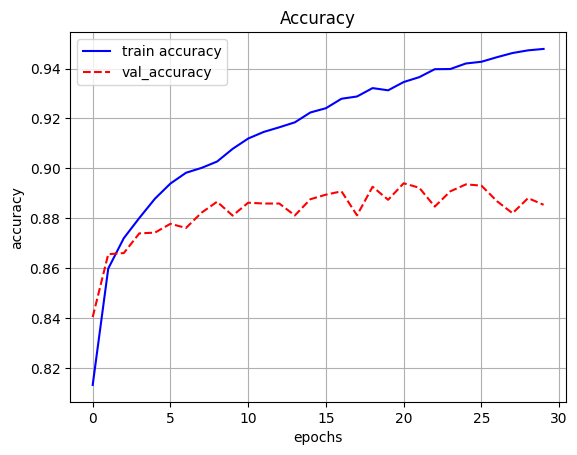

In [ ]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot(hist.history['accuracy'], 'b-', label='train accuracy')
plt.plot(hist.history['val_accuracy'], 'r--', label='val_accuracy')
plt.legend(loc='best')

plt.show()

#[7] 혼동 행렬(confusion matrix)

313/313 [==============================] - 1s 2ms/step


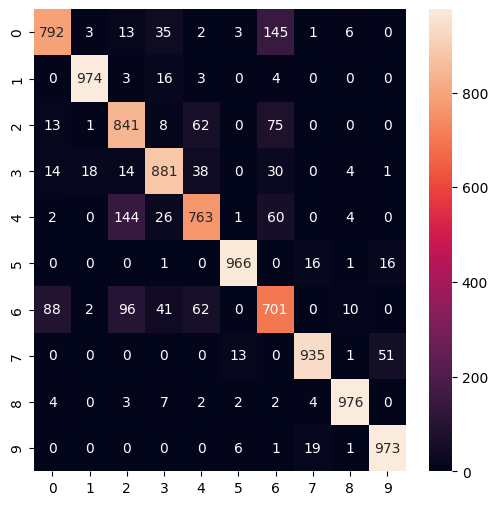

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(t_test, np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()